# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [11]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

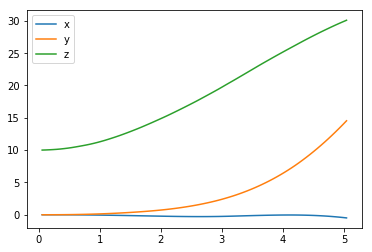

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

#### Visualize the quadcopter position and velocity

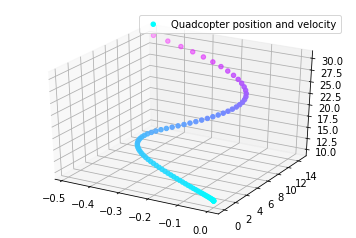

In [28]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
combined_velocity = np.array(list(zip(results['x_velocity'], results['y_velocity'], results['z_velocity'])))
velocity_value = np.sum(combined_velocity ** 2, axis=1)
min = np.min(velocity_value)
max = np.max(velocity_value)
range = max - min
velocity_factor = (velocity_value - min) / range

ax.scatter(results['x'], results['y'], results['z'], c=cm.cool(velocity_factor), label='Quadcopter position and velocity')
ax.legend()

plt.show()

The next code cell visualizes the velocity of the quadcopter.

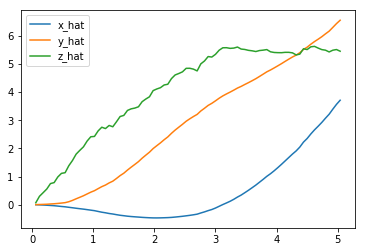

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

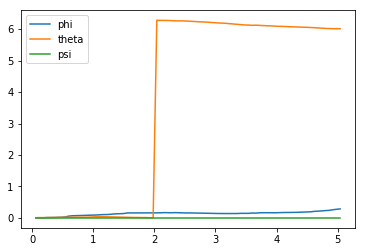

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

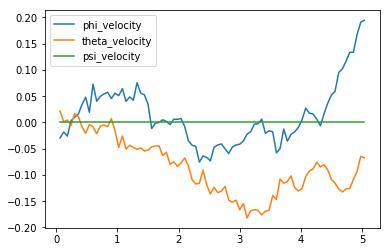

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

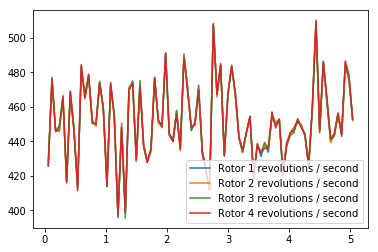

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 2.20610972 14.38331998 30.29229971  0.28571018  6.01051503  0.        ]
[3.71156153 6.55425361 5.45353964]
[ 0.1945567  -0.06726923  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -2.979 (best =   0.007), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
!mkdir episodes
from run import fly

fly(num_episodes=2000)

mkdir: cannot create directory ‘episodes’: File exists


/home/kurazu/workspace/deep-learning-foundation/RL-Quadcopter-2/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Actor model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
raw_actions (Dense)          (None, 1)                 65        
_________________________________________________________________
actions (Lambda)             (None, 1)                 0         
Total params: 897
Trainable params: 769
Non-trainable params: 128
________________________________________________________________

  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 169.16245549378448 after 10 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 95.52758338952228 after 20 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 101.07869134306664 after 30 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 103.32709033763187 after 40 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 530.2246658975471 after 50 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 92.8961006337486 after 60 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 97.90228853797979 after 70 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 94.94358060522386 after 80 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 92.20243064756173 after 90 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.16839121709756 after 100 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 86.9868084338188 after 110 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 87.25469881243107 after 120 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 86.99850030761914 after 130 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 87.24691479471474 after 140 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.68048128979953 after 150 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 90.4507492887762 after 160 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 93.68980140071753 after 170 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 196.35604315751965 after 180 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 354.9030111978269 after 190 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 1939.025289425082 after 200 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 519.602521643479 after 210 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 2787.3268003699914 after 220 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 1381.9816502502845 after 230 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 2633.8761467583618 after 240 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 3352.90700653379 after 250 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 1321.031581502066 after 260 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 2374.553283373544 after 270 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 305.7275315693247 after 280 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 1134.4436994642545 after 290 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 160.1734231488678 after 300 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 153.3050764675648 after 310 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 135.29078551942965 after 320 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 94.9420610524726 after 330 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.86587004515553 after 340 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 89.43240664210282 after 350 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 89.08398218001149 after 360 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.63914504609434 after 370 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.29662094588073 after 380 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.30477456885582 after 390 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.52682488574506 after 400 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.35508916091752 after 410 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.59240902538866 after 420 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 89.55674759382268 after 430 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 91.94905813756668 after 440 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 93.0236112084413 after 450 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 94.53334918275377 after 460 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 148.0212866761761 after 470 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 111.3559813894714 after 480 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 128.4304133023007 after 490 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 132.64085471396976 after 500 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 107.87047566158626 after 510 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 125.02071508634276 after 520 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 105.35712244088037 after 530 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 107.53295194915252 after 540 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 111.18792795063166 after 550 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 95.73835070146797 after 560 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.70742477371482 after 570 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 192.0793018565853 after 580 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 242.1183350422199 after 590 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 240.78698158794546 after 600 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 257.2119561961238 after 610 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 272.7759177642004 after 620 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 5084.025250488454 after 630 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 806.5323059230957 after 640 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 1080.458760461642 after 650 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 7966.238258067062 after 660 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 1552.4688569107616 after 670 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 1286.818703343043 after 680 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 693.9034824365592 after 690 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 570.4128925321223 after 700 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 556.7355165079132 after 710 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 596.9399550485591 after 720 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 564.631304155957 after 730 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 560.6592775581071 after 740 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 563.8293622744494 after 750 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 568.0212922619246 after 760 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 660.5464169743649 after 770 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 540.4960364146184 after 780 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 660.6743916312557 after 790 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 506.26296189245386 after 800 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 2464.1063832363216 after 810 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 7026.484616995641 after 820 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 621.5129229221369 after 830 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 447.4641743801938 after 840 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 298.71471901190523 after 850 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 258.614467481772 after 860 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 245.31807403692991 after 870 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 242.5471034222356 after 880 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 260.27224209889664 after 890 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 219.83013036947585 after 900 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 185.91749659322525 after 910 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 202.17521836514547 after 920 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 218.8451761014287 after 930 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 204.9320593839371 after 940 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 203.53624828964598 after 950 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 195.46165116406624 after 960 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 161.01585305249944 after 970 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 167.25380402635955 after 980 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 166.90027972339576 after 990 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 170.07421319396445 after 1000 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 170.05679721650864 after 1010 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 240.43083482224597 after 1020 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 213.03601089433818 after 1030 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 224.65939718431144 after 1040 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 194.97801525103245 after 1050 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 194.64551635598147 after 1060 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 141.47844945668442 after 1070 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 141.417177549446 after 1080 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 130.43714869709365 after 1090 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 95.10946499698217 after 1100 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.46838637491359 after 1110 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.36462226208401 after 1120 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.31334875422596 after 1130 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.24938269720602 after 1140 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 87.6828559097651 after 1150 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 87.69755422511668 after 1160 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.10362761240903 after 1170 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.18214364867552 after 1180 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.21482643335644 after 1190 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 87.84558475106829 after 1200 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 87.95087568558277 after 1210 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.31649143880293 after 1220 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 87.93214743398691 after 1230 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.20236249655177 after 1240 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.14590706917852 after 1250 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.17701219501502 after 1260 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.46689895647728 after 1270 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 89.44956956679215 after 1280 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 92.26897145809298 after 1290 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 92.05917684577692 after 1300 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 1576.9234498670917 after 1310 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 4282.27544174755 after 1320 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 1126.6592283138416 after 1330 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 709.8336675411822 after 1340 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 13269.2370624287 after 1350 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 183.35853919819698 after 1360 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 92.29308288877766 after 1370 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.1568889014022 after 1380 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 87.72815299629144 after 1390 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.45253931756606 after 1400 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 91.23127211170952 after 1410 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 90.92390629421399 after 1420 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 89.90585931643618 after 1430 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 90.05675652892869 after 1440 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 90.63940666733053 after 1450 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.3606085665307 after 1460 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 89.14471030018856 after 1470 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 90.88317737472003 after 1480 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 89.97031808650476 after 1490 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 90.47254843841259 after 1500 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 89.32159818738673 after 1510 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.04504182139603 after 1520 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.14654127638886 after 1530 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 88.5365067675286 after 1540 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 89.67472147190595 after 1550 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 89.69710889868242 after 1560 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 2648.3309271896223 after 1570 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 7146.279817057664 after 1580 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 511.23120765899114 after 1590 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 901.3055266237452 after 1600 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 7174.00586283942 after 1610 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 404.8948137125705 after 1620 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 477.7842033240392 after 1630 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 216.69139702902362 after 1640 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 685.783987373103 after 1650 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 178.07469695973052 after 1660 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 308.951098051534 after 1670 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 118.20829833868258 after 1680 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 96.28548677115893 after 1690 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 95.64806517364102 after 1700 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 97.4774142960656 after 1710 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 97.82085255242778 after 1720 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 100.58343282779016 after 1730 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 97.83663508598765 after 1740 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 98.4922760625006 after 1750 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 97.00936559967926 after 1760 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 95.95439881253807 after 1770 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 95.4698241735932 after 1780 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 97.87193102392851 after 1790 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 99.7313462025423 after 1800 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 99.7212412770427 after 1810 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 100.09898037612432 after 1820 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 104.49351293289703 after 1830 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 709.3533840468248 after 1840 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 90.3022203578386 after 1850 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 91.20322578357342 after 1860 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 91.3589539036453 after 1870 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 91.45881734397108 after 1880 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 91.8293769689644 after 1890 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 91.77197817961778 after 1900 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 92.48482264194651 after 1910 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 93.26541550291181 after 1920 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 94.79248384241531 after 1930 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 98.78346569182477 after 1940 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 3418.4721482544787 after 1950 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 993.7899251078554 after 1960 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 1379.1261504029133 after 1970 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 2395.9339328080596 after 1980 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 150.56342506246654 after 1990 episodes / 2000


  0%|          | 0/10 [00:00<?, ?it/s]

AVG Reward 97.6560403165562 after 2000 episodes / 2000


[681.8001223829785,
 251.16177866033152,
 100.27666606101278,
 94.0523489519106,
 91.10020431760168,
 91.09757797592576,
 94.78043234216797,
 97.98018776456492,
 96.44404686282982,
 92.93118961852134,
 92.96174027011173,
 91.8343318775962,
 93.76726991180456,
 94.23347138748754,
 95.72371108413547,
 96.7639629315679,
 96.46509525718103,
 97.51695372353693,
 97.36208859924096,
 98.64720885256071,
 96.90757361152126,
 99.03832621083336,
 99.32682256185967,
 99.74375335391511,
 98.80282094205101,
 101.90114149667657,
 103.09264964912451,
 103.53007157088321,
 104.962455597456,
 103.48129843634557,
 103.24897338880817,
 102.21428050938354,
 100.73776920495028,
 101.96117735209495,
 104.54460036882871,
 104.65089536671367,
 103.21721425625988,
 101.92655329795588,
 104.9527290208105,
 105.8167106105131,
 106.55357467920535,
 108.97083888572821,
 111.49219493574624,
 119.2554201809302,
 117.97675312604107,
 4385.301535578793,
 87.427791149369,
 87.40634243181734,
 88.87081642391892,
 88.9913

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: